# Проект: Анализ оттока клиентов банка "Метанпром"

**Описание проекта**

Отдел маркетинга банка инициировал исследование для анализа и сегментации клиентов, склонных к оттоку. Информация необходима менеджеру по маркетинговым кампаниям, который тесно сотрудничает с менеджерами продуктов. Основная цель — определить однородные и высокоотточные сегменты клиентов, покрывающие основные проблемные зоны банка, чтобы с помощью маркетинговых воздействий снизить уровень оттока.

Потребность в исследовании возникла из-за резкого увеличения оттока клиентов, что угрожает устойчивости банка. Ранее была попытка решения проблемы через дашборд, но он устарел и больше не отражает текущую ситуацию, так как состав клиентов изменился, а старые сегменты потеряли актуальность.

**Цель проекта**

Определить однородные сегменты клиентов, склонных к оттоку, и разработать рекомендации для их удержания, чтобы снизить уровень оттока и минимизировать риски для банка.

**Задачи проекта**

- Провести исследовательский анализ, включающий исследование корреляций и портретов клиентов
- Проверить гипотезы (одна дана заранее, минимум ещё одну надо сформулировать), отслеживая применимость используемого стат.критерия к исследуемым данным
- Сделать выводы о том, какие признаки стратегическим образом влияют на отток и какие значения или интервалы этих признаков связаны с оттоком
- Выделить не мелкие, но компактные высокоотточные сегменты, приоритизировать их
- Дать конкретные рекомендации по приоритетным сегментам
- Подготовить презентацию со всеми ключевыми моментами

**Описание данных**

Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в
Ярославле и областных городах: Ростов Великий и Рыбинск.

Колонки:
- `USERID` — идентификатор пользователя,
- `score` — баллы кредитного скоринга,
- `city` — город,
- `gender` — пол,
- `age` — возраст,
- `equity` — количество баллов собственности
- `balance` — баланс на счёте,
- `products` — количество продуктов, которыми пользуется клиент,
- `credit_card` — есть ли кредитная карта,
- `last_activity` — активный клиент,
- `EST_SALARY` — оценочный доход клиента,
- `сhurn` — признак оттока.

## Загрузка данных и подготовка к исследованию

### Импорт необходимых библиотек

Импортируем в проект необходимые библиотеки

In [ ]:
# Работа с табличными данными
import pandas as pd

# Операции с массивами данных и матрицами
import numpy as np
!pip install phik
import phik
from phik import report
from phik import resources

# Визуализация данных: статичные графики
import matplotlib.pyplot as plt
import seaborn as sns

# Визуализация данных: интерактивные графики
import plotly.express as px
import plotly.graph_objects as go

# Статистические расчёты и проверка гипотез
import scipy.stats as stats

     |████████████████████████████████| 686 kB 1.2 MB/s eta 0:00:01


### Загрузка и обзор данных

Загрузим предоставленные данные и проведём первичный анализ

In [ ]:
# Загружаем данные
try:
    df = pd.read_csv(
        '/datasets/bank_scrooge.csv'
)

except:
    df = pd.read_csv(
        'datasets/bank_scrooge.csv'
)

In [ ]:
# Выводим первые строки датафрейма
df.head()

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


In [ ]:
# Выводим общую информацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


In [ ]:
# Краткий обзор числовых данных датафрейма
df.describe()

,USERID,score,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
count,10000.00000,10000.000000,9974.000000,10000.000000,7.705000e+03,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000
mean,171814.71260,848.699400,42.734409,2.627600,8.277943e+05,1.870100,0.680400,0.523500,1.478669e+05,0.182000
std,33708.23812,65.448519,12.179971,1.980836,1.980614e+06,0.792647,0.466345,0.499472,1.393885e+05,0.385864
min,94561.00000,642.000000,18.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2.546300e+03,0.000000
25%,142810.25000,802.000000,33.000000,0.000000,2.955542e+05,1.000000,0.000000,0.000000,7.525190e+04,0.000000
50%,172728.00000,853.000000,40.000000,3.000000,5.242722e+05,2.000000,1.000000,1.000000,1.196581e+05,0.000000
75%,201261.75000,900.000000,51.000000,4.000000,9.807058e+05,2.000000,1.000000,1.000000,1.745005e+05,0.000000
max,229145.00000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000


In [ ]:
# Выясним сколько уникальных клиентов и городов представлено в датафрейме
print(f"Уникальных клиентов в датафрейме: {df['USERID'].nunique()}")
print(f"Уникальных городов в датафрейме: {df['city'].unique()}")

Уникальных клиентов в датафрейме: 9927
Уникальных городов в датафрейме: ['Рыбинск' 'Ярославль' 'Ростов']


**Вывод:**<br/>
- Датафрейм ключает **12 столбцов** и содержит **10,000 записей**.
- Типы данных представлены как: **float64**, **int64**, и **object**.
- Тип данных всех столбцов, кроме `age` (float64), соответствует содержимому.
- Пропущенные значения обнаружены в `age` и `balance`.
- В стобце `products` зафиксировано минимальное значение `0`. Часть клиентов не пользуется ни одним из продуктов, нужно будет избавиться от таких клинтов.
- Среди **10,000 записей** в датасете, **9,927 уникальных клиентов**.
- Названия столбцов `USERID` и `EST_SALARY` не соответсвуют стилю snake_case.

## Предобработка данных

### Проверить и привести к единому стилю наименования колонок

Приведём название столбцов к нижнему регистру и snake_case

In [ ]:
# Переименуем колонки
df = df.rename(columns={'USERID':'user_id',
                        'EST_SALARY': 'est_salary'})

### Проверить и обработать пропущенные значения

В предыдущих пунктах было выяснено, что пропуски присутствуют в столбцах `age` и `balance`. Выведем строки с пропусками в указанных столбцах.

In [ ]:
# Выведем количество пропусков в датасете
df.isnull().sum()

user_id             0
score               0
city                0
gender              0
age                26
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
dtype: int64

In [ ]:
# Выведем строки с пропусками в столбце age
df[df['age'].isna()].sample(10)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
2444,221156,913.0,Ярославль,М,NaN,0,NaN,1,1,1,135693.24,0
7236,210135,908.0,Рыбинск,Ж,NaN,4,1120340.31,3,1,1,85002.15,0
9634,221809,917.0,Ярославль,М,NaN,0,NaN,1,1,1,192644.15,0
7248,219343,920.0,Рыбинск,Ж,NaN,0,NaN,1,1,0,159248.67,0
8293,216848,930.0,Ярославль,М,NaN,0,NaN,1,1,1,199542.51,0
7345,184913,829.0,Ярославль,Ж,NaN,3,188648.77,2,0,1,75206.90,0
5470,218868,827.0,Рыбинск,Ж,NaN,4,448959.07,2,1,1,67835.95,0
9632,185829,927.0,Ярославль,М,NaN,0,NaN,1,1,0,231254.86,0
8785,127440,663.0,Ярославль,М,NaN,0,NaN,1,1,1,117197.56,0
8385,206759,915.0,Рыбинск,М,NaN,0,NaN,1,1,0,71179.53,0


In [ ]:
# Обзор числовых данных в строках с пропусками в age
df[df['age'].isna()].describe()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,26.00000,26.000000,0.0,26.000000,1.000000e+01,26.000000,26.000000,26.000000,26.000000,26.000000
mean,194637.50000,855.153846,NaN,1.384615,1.250034e+06,1.346154,0.769231,0.769231,178585.199231,0.038462
std,31310.54801,83.418316,NaN,1.961161,2.265235e+06,0.561591,0.429669,0.429669,175135.552768,0.196116
min,127440.00000,663.000000,NaN,0.000000,1.715102e+05,1.000000,0.000000,0.000000,55073.630000,0.000000
25%,185142.00000,827.500000,NaN,0.000000,2.523268e+05,1.000000,1.000000,1.000000,77807.760000,0.000000
50%,208447.00000,888.500000,NaN,0.000000,4.173611e+05,1.000000,1.000000,1.000000,142598.860000,0.000000
75%,219224.25000,919.250000,NaN,3.000000,1.039439e+06,2.000000,1.000000,1.000000,176991.690000,0.000000
max,228075.00000,942.000000,NaN,5.000000,7.601719e+06,3.000000,1.000000,1.000000,922080.250000,1.000000


In [ ]:
# Выведем строки с пропусками в столбце balance
df[df['balance'].isna()].sample(10)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
9402,174647,887.0,Ярославль,М,38.0,1,NaN,1,1,1,155248.50,0
9160,200873,943.0,Ярославль,Ж,44.0,0,NaN,1,0,0,437644.90,0
8317,198303,956.0,Ярославль,М,45.0,0,NaN,2,1,1,302791.33,0
7186,133888,943.0,Рыбинск,М,55.0,0,NaN,1,1,1,153241.67,0
7440,189516,711.0,Ярославль,М,34.0,0,NaN,2,1,1,234644.09,0
5879,140239,660.0,Ярославль,Ж,51.0,0,NaN,2,1,0,134111.17,0
6026,134162,903.0,Ярославль,М,46.0,0,NaN,1,1,0,224500.32,0
3206,148933,698.0,Рыбинск,М,27.0,0,NaN,1,1,1,106180.82,0
6246,154105,897.0,Ярославль,М,26.0,0,NaN,1,1,1,41125.55,0
3548,146889,714.0,Рыбинск,М,37.0,0,NaN,1,1,1,341121.65,0


In [ ]:
# Обзор числовых данных в строках с пропусками в balance
df[df['balance'].isna()].describe()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,2295.000000,2295.000000,2279.000000,2295.000000,0.0,2295.000000,2295.000000,2295.000000,2.295000e+03,2295.000000
mean,172069.447930,865.352070,42.093023,0.050980,NaN,1.162092,0.815686,0.549455,2.263102e+05,0.005664
std,33337.084589,89.603091,11.941551,0.225872,NaN,0.402532,0.387824,0.497657,1.997718e+05,0.075066
min,114182.000000,642.000000,18.000000,0.000000,NaN,0.000000,0.000000,0.000000,2.027403e+04,0.000000
25%,143095.500000,871.000000,33.000000,0.000000,NaN,1.000000,1.000000,0.000000,1.203477e+05,0.000000
50%,172659.000000,903.000000,40.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.741607e+05,0.000000
75%,201551.000000,922.000000,49.000000,0.000000,NaN,1.000000,1.000000,1.000000,2.400150e+05,0.000000
max,229145.000000,990.000000,86.000000,3.000000,NaN,3.000000,1.000000,1.000000,1.333687e+06,1.000000


Закономерностей в возникновении пропусков не обнаружено.
- `age` — 26 пропусков
- `balance` — 2295 пропусков

Доля пропусков в `age` совсем маленькая (0,26%) — удалим строки с пропусками.

In [ ]:
df = df.dropna(subset=['age'])

Пропусков в `balance` уже намного больше, удаление или заполнение медианными значениями может повлиять на результаты дальнейшего исследования.<br/>
Выведем числовые данные записей с пропусками и без пропусков в `balance`.

In [ ]:
display(df[df['balance'].isnull()].describe())
display(df[~df['balance'].isnull()].describe())

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,2279.000000,2279.000000,2279.000000,2279.000000,0.0,2279.000000,2279.000000,2279.000000,2.279000e+03,2279.000000
mean,171904.885915,865.357174,42.093023,0.051338,NaN,1.163229,0.815270,0.548925,2.263454e+05,0.005704
std,33303.215270,89.553735,11.941551,0.226623,NaN,0.403713,0.388164,0.497710,1.998256e+05,0.075327
min,114182.000000,642.000000,18.000000,0.000000,NaN,0.000000,0.000000,0.000000,2.027403e+04,0.000000
25%,142992.500000,871.000000,33.000000,0.000000,NaN,1.000000,1.000000,0.000000,1.202174e+05,0.000000
50%,172304.000000,903.000000,40.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.743479e+05,0.000000
75%,201257.000000,922.000000,49.000000,0.000000,NaN,1.000000,1.000000,1.000000,2.403728e+05,0.000000
max,229145.000000,990.000000,86.000000,3.000000,NaN,3.000000,1.000000,1.000000,1.333687e+06,1.000000


,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,7695.000000,7695.000000,7695.000000,7695.000000,7.695000e+03,7695.000000,7695.000000,7695.000000,7.695000e+03,7695.000000
mean,171710.892268,843.744120,42.924366,3.394802,8.272456e+05,2.081222,0.640156,0.515140,1.245204e+05,0.234698
std,33812.862444,55.342539,12.244010,1.584817,1.980327e+06,0.757446,0.479986,0.499803,1.046671e+05,0.423837
min,94561.000000,689.000000,18.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,2.546300e+03,0.000000
25%,142638.000000,801.000000,33.000000,2.000000,2.956987e+05,2.000000,0.000000,0.000000,6.755698e+04,0.000000
50%,172710.000000,840.000000,40.000000,4.000000,5.242953e+05,2.000000,1.000000,1.000000,1.062502e+05,0.000000
75%,201145.500000,882.000000,52.000000,5.000000,9.800512e+05,2.000000,1.000000,1.000000,1.551446e+05,0.000000
max,229136.000000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000


Пользователи с пропусками в `balance` имеют:
- более низкое количество баллов собственности
- пользуются более низким числом продуктов
- в среднем имеют более высокие зарплаты

Однозначно определить природу пропусков не удалось. Оставим их без изменений.

### Проверить типы данных и привести их к корректным

Тип данных столбца `age` — **float64**, заменим на его целочисленный **int64**.

In [ ]:
df['age'] = df['age'].astype('int64')
df.dtypes

user_id            int64
score            float64
city              object
gender            object
age                int64
equity             int64
balance          float64
products           int64
credit_card        int64
last_activity      int64
est_salary       float64
churn              int64
dtype: object

### Исследовать и удалить дубликаты

Проверим датафрейм на наличие дубликатов

In [ ]:
# Найдём количество явных дубликатов
df.duplicated().sum()

0

Явных дубликатов не обнаружено. При этом в предыдущих пунктах, при первом обзоре данных, было выяснено, что в столбце `user_id` уникальных значений идентификаторов (**9,927**) меньше, чем записей в датафрейме (**10,000**).

In [ ]:
# Найдём количество дубликатов в user_id
df['user_id'].duplicated().sum()

50

In [ ]:
# Выведем строки с дубликатами в user_id
df.loc[df.duplicated(subset = ['user_id'], keep=False)].sort_values(by='user_id').head(20)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1893,116540,883.0,Рыбинск,Ж,55,1,362756.49,3,0,1,175920.48,1
7694,116540,887.0,Ярославль,Ж,38,0,NaN,1,0,1,119247.61,0
4866,117943,855.0,Рыбинск,Ж,32,6,1036832.93,4,1,1,107792.71,1
7542,117943,880.0,Ярославль,Ж,40,0,NaN,1,1,0,137718.93,0
5863,120258,908.0,Рыбинск,Ж,38,4,2213581.63,2,0,1,160327.77,1
5896,120258,905.0,Ярославль,М,30,0,NaN,1,1,1,146427.96,0
1411,123461,829.0,Ярославль,Ж,59,0,96222.44,2,0,1,102771.55,1
8638,123461,934.0,Рыбинск,М,34,0,NaN,2,1,0,291619.27,0
9775,124450,758.0,Рыбинск,Ж,36,0,73574.07,2,0,1,79963.59,0
8164,124450,859.0,Ярославль,Ж,38,6,516811.20,1,1,1,95144.63,1


Закономерности в возникновении дубликатов не обнаружены: данные дублей могут различаться, включая такие параметры, как пол. Вероятной причиной их появления является технический сбой при записи или выгрузке данных. Дубликаты будут удалены.

In [ ]:
# Удалим дубликаты
df['user_id'] = df['user_id'].drop_duplicates().reset_index(drop=True)

### Исследовать аномалии

Исследуем датасет на наличие аномальных значений.

Ещё при ознакомлении с данными в столбце `products` были обнаружены нулевые значения, указывающие на то, что некоторые клиенты не пользуются продуктами банка. Вероятно, это связано с их уходом. Для анализа важно учитывать актуальные данные на момент, когда клиенты еще были активны, поэтому такие строки должны бить удалены.

In [ ]:
# Выведем строки, где значение в столбце `products` равно 0
df.loc[df['products']== 0]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
8957,152499.0,962.0,Рыбинск,Ж,79,3,NaN,0,0,0,25063.96,1


Оказалось, что такая строка всего одна. Избавимся от неё.

In [ ]:
# Удалим строку с нулевым значанием в `products`
df = df.loc[df['products'] != 0]

**Вывод:**<br/>
- Названия столбцов `USERID` и `EST_SALARY` преобразованы к нижнему регистру и формату **snake_case** для удобства работы с данными.
- Пропуски обнаружены в следующих столбцах:
  - **`age`**: строки с пропущенными значениями удалены.
  - **`balance`**: пропуски оставлены, так как их удаление или заполнение могло бы исказить данные.
- Тип данных в столбце **`age`** приведён к формату **int64**, чтобы соответствовать числовому типу.
- В столбце **`user_id`** найдены и удалены дубликаты, что обеспечило уникальность данных по идентификатору пользователя.
- Обнаружена одна аномалия в столбце **`products`**, где значение было равно нулю. Она удалена, так как клиент уже не использует продукты банка.

## Исследовательский анализ данных (EDA)

Проведём исследовательский анализ данных, определим все значимые
признаки отточности. Изучим распределение параметров, в том числе по признаку оттока. Выделим интервалы значений характеристик, которые связаны с
повышенным оттоком, сравним портреты типичных клиентов, которые
склонны и не склонны уходить из банка.

### Изучить распределение параметров (включая разрез по признаку оттока churn)

Напишем функцию для вычисления нижней и верхней границы значений столбца на основе межквартильного размаха. Используем для определния выбросов.

In [ ]:
# Определение IQR-граничных значений
def IQR_limits(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return max(df[column].min(), lower), min(df[column].max(), upper)

Напишем функции для визуализации числовых и категориальных параметров, в том числе в разрезе оттока.

In [ ]:
# Визуализация распределений числовых параметров (нормализованные гистограммы)
def continuous_param_plot(df, column):
    lower, upper = IQR_limits(df, column)
    filtered_data = df[(df[column] >= lower) & (df[column] <= upper)]  # Исключаем выбросы

    plt.figure(figsize=(14, 6))

    # Построение нормализованной гистограммы для данных без выбросов
    sns.histplot(filtered_data[column], bins=30, color='blue', alpha=0.5, kde=False, stat='density', label='Распределение параметра')

    # Линии границ выбросов
    plt.axvline(lower, color='red', linestyle='--', label=f'Нижняя граница выбросов ({lower:.2f})')
    plt.axvline(upper, color='red', linestyle='--', label=f'Верхняя граница выбросов ({upper:.2f})')

    # Линия медианы
    plt.axvline(df[column].median(), color='green', linestyle='-', label=f'Медиана ({df[column].median():.2f})')

    # Настройки графика
    plt.title(f'Нормализованное распределение параметра {column} (без выбросов)')
    plt.xlabel(column)
    plt.ylabel('Плотность')
    plt.legend()
    plt.grid(True)
    plt.show()

# Визуализация распределений числовых параметров в разрезе оттока (нормализованные гистограммы)
def continuous_param_plot_churn(df, column, markers=None):
    lower, upper = IQR_limits(df, column)

    # Исключаем выбросы для каждой группы
    filtered_data_0 = df[(df['churn'] == 0) & (df[column] >= lower) & (df[column] <= upper)]
    filtered_data_1 = df[(df['churn'] == 1) & (df[column] >= lower) & (df[column] <= upper)]

    plt.figure(figsize=(14, 6))

    # Нормализованные гистограммы для данных без выбросов
    sns.histplot(filtered_data_0[column], bins=30, color='green', alpha=0.5, kde=False, stat='density', label='Неотточные клиенты')
    sns.histplot(filtered_data_1[column], bins=30, color='red', alpha=0.5, kde=False, stat='density', label='Отточные клиенты')

    # Линии границ выбросов
    plt.axvline(lower, color='red', linestyle='--', label=f'Нижняя граница выбросов ({lower:.2f})')
    plt.axvline(upper, color='red', linestyle='--', label=f'Верхняя граница выбросов ({upper:.2f})')

    # Линия медианы
    plt.axvline(df[column].median(), color='green', linestyle='-', label=f'Медиана ({df[column].median():.2f})')

    # Добавление пользовательских маркеров
    if markers:
        for marker in markers:
            plt.axvline(marker, color='blue', linestyle='-', label=f'Граница оттока ({marker})')

    # Настройки графика
    plt.title(f'Нормализованное распределение параметра {column} в разрезе оттока (без выбросов)')
    plt.xlabel(column)
    plt.ylabel('Плотность')
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
# Визуализация категориальных параметров
def category_param_plot(df, column):
    plt.figure(figsize=(14, 7))
    ax = sns.countplot(data=df, x=column, color='lightblue', palette='Set2', alpha=0.7)
    plt.title(f'Распределение параметра {column}')
    plt.xlabel(column)
    plt.ylabel('Количество')

    # Добавление подписей на столбцы с процентами
    total = len(df)
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height} ({height/total*100:.1f}%)',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', fontsize=12, color='black',
                    xytext=(0, 10), textcoords='offset points')

    plt.grid(True)
    plt.show()

# Визуализация категориальных параметров в разрезе оттока
def category_param_plot_churn(df, column):
    plt.figure(figsize=(14, 7))
    ax = sns.countplot(data=df, x=column, hue='churn', hue_order=[0, 1], palette='Set2', alpha=0.7)
    plt.title(f'Распределение параметра {column} в разрезе оттока')
    plt.xlabel(column)
    plt.ylabel('Количество')

    # Добавление подписей на столбцы
    total = len(df)
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height} ({height/total*100:.1f}%)',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', fontsize=12, color='black',
                    xytext=(0, 10), textcoords='offset points')

    plt.legend(['Неотточные клиенты', 'Отточные клиенты'])
    plt.grid(True)
    plt.show()

# Анализ уровня оттока по категориям
def levels_plot(df, column):
    levels = df.groupby(column)['churn'].mean().reset_index()
    plt.figure(figsize=(14, 7))
    ax = sns.barplot(data=levels, x=column, y='churn', color='lightblue', alpha=0.7)
    plt.axhline(df['churn'].mean(), color='red', linestyle='--', label=f'Средний уровень оттока ({df["churn"].mean():.2f})')
    plt.title(f'Уровни оттока по параметру {column}')
    plt.xlabel(column)
    plt.ylabel('Уровень оттока')
    plt.legend()

    # Добавление подписей на столбцы
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=12, color='black',
                    xytext=(0, 10), textcoords='offset points')

    plt.grid(True)
    plt.show()

#### Анализ распределения баллов кредитного скоринга клиентов

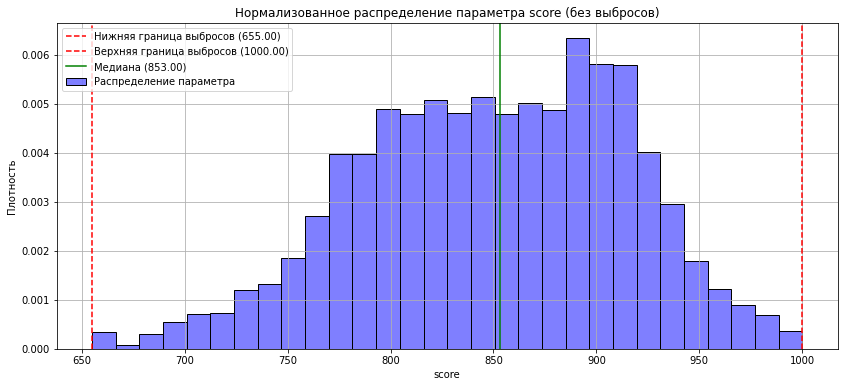

In [ ]:
# Визуализация распределений числовых параметров `score`
continuous_param_plot(df, 'score')

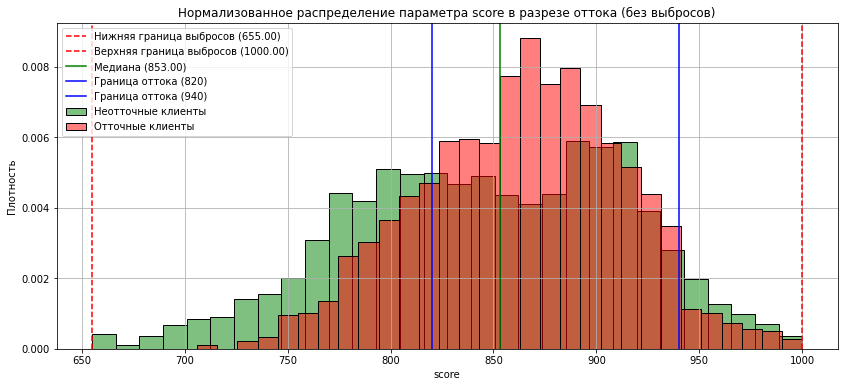

In [ ]:
# Визуализация распределений числовых параметров `score` в разрезе оттока
continuous_param_plot_churn(df, 'score', markers=[820, 940])

In [ ]:
df['score'].describe()

count    9973.000000
mean      848.671212
std        65.393153
min       642.000000
25%       802.000000
50%       853.000000
75%       900.000000
max      1000.000000
Name: score, dtype: float64

1. **Общее распределение кредитного скоринга:**
 - Значения кредитного соринга варьируются от 642 до 1000.
 - У большинства клиентов скоринг находится в диапазоне **от 750 до 950**.
 - Среднее значение — около **849**, с небольшим сдвигом в сторону более высоких значений.

2. **Распределение по оттоку:**
 - У **отточных клиентов** скоринг в основном лежит в пределах **820–940**.
 - Оба распределения пересекаются, что говорит о **слабом влиянии скоринга** на отток клиентов.

#### Анализ распределения клиентов по городу

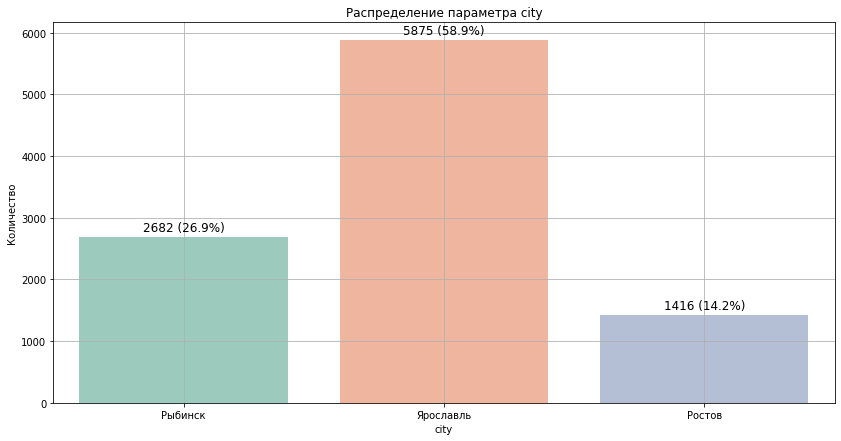

In [ ]:
# Визуализация категориальных параметров `city`
category_param_plot(df, 'city')

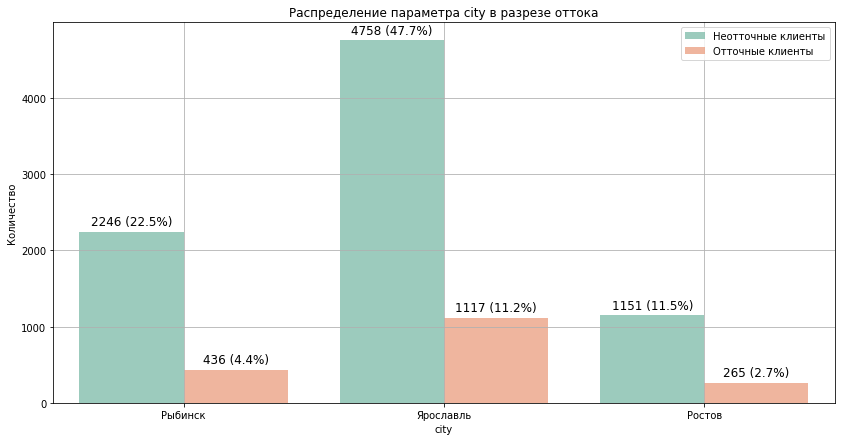

In [ ]:
# Визуализация категориальных параметров `city` в разрезе оттока
category_param_plot_churn(df, 'city')

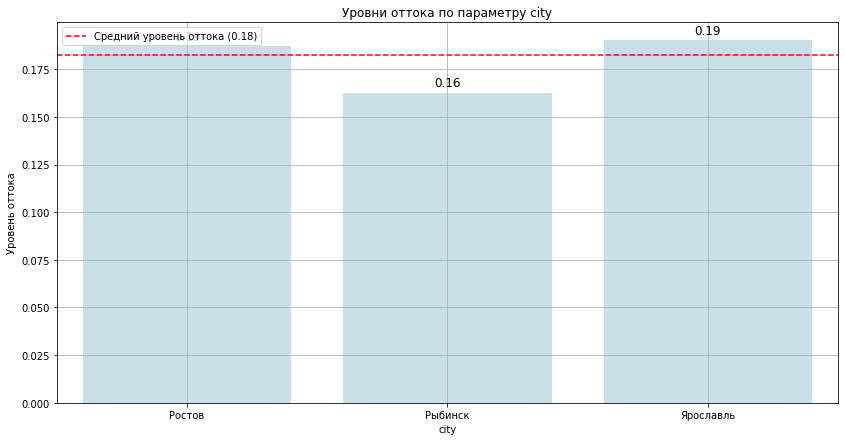

In [ ]:
# Анализ уровня оттока по категориям `city`
levels_plot(df, 'city')

In [ ]:
df['city'].value_counts()

Ярославль    5875
Рыбинск      2682
Ростов       1416
Name: city, dtype: int64

- Наибольшее количество клиентов сосредоточено в **Ярославле (5875)**.
- В Ярославле и Ростове **уровень оттока 19%** превышает средний (18%), это превышение незначительно.

Таким образом, можно утверждать, что отток клиентов между городами происходил равномерно, и географический фактор в данном случае не оказывает существенного влияния на уровень оттока.

#### Анализ распределения клиентов по полу

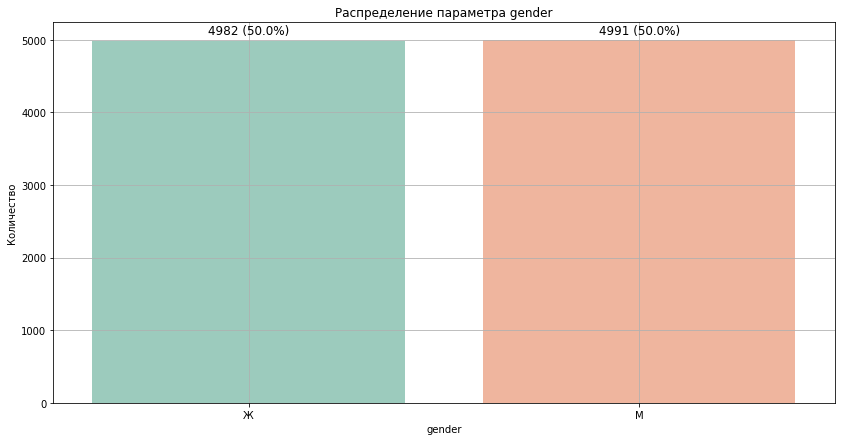

In [ ]:
# Визуализация категориальных параметров `gender`
category_param_plot(df, 'gender')

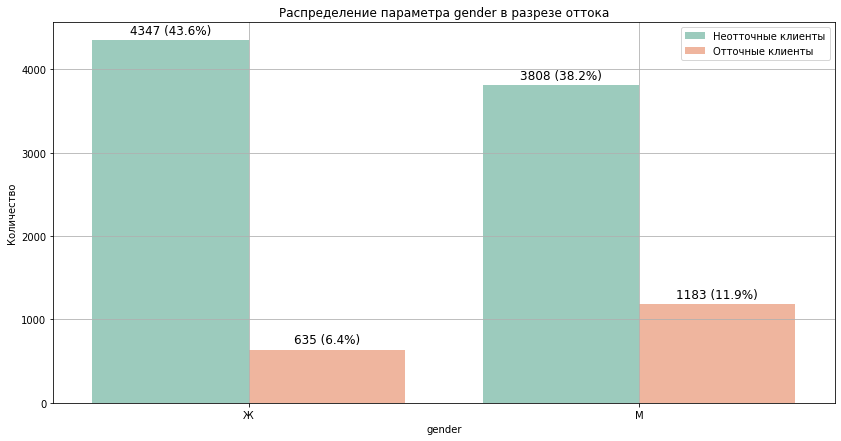

In [ ]:
# Визуализация категориальных параметров `gender` в разрезе оттока
category_param_plot_churn(df, 'gender')

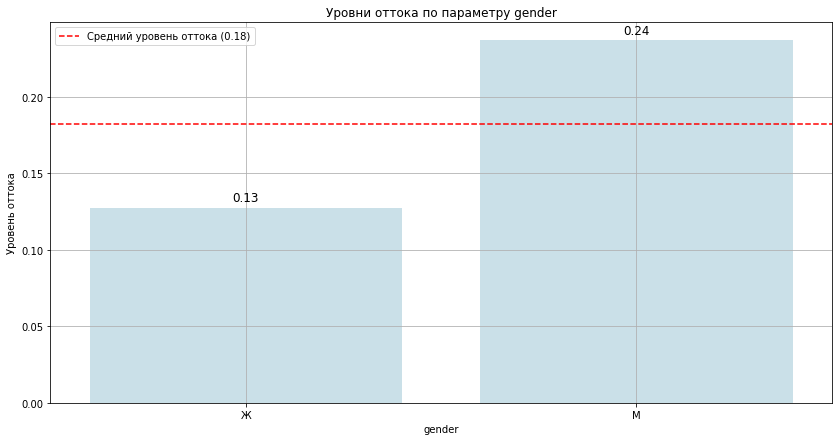

In [ ]:
# Анализ уровня оттока
levels_plot(df, 'gender')

In [ ]:
df['gender'].value_counts()

М    4991
Ж    4982
Name: gender, dtype: int64

- Мужчин и женщин примерно одинаковое количество:
 - М 4991
 - Ж 4982
- Чаще всего уходят Мужчины, процент оттока - **24%**.

#### Анализ распределения клиентов по возрасту

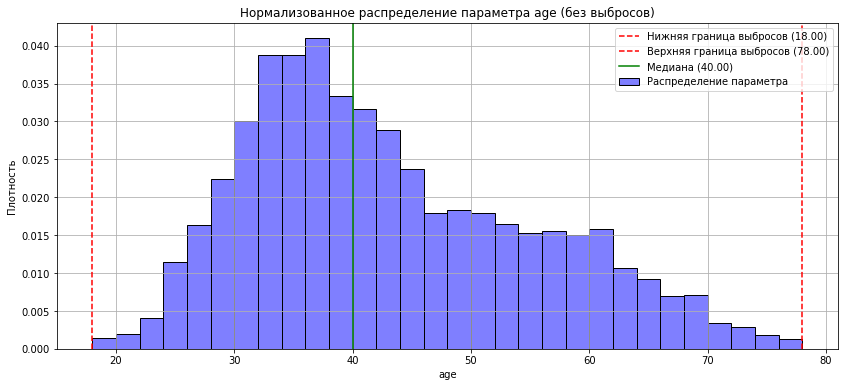

In [ ]:
# Визуализация распределений числовых параметров `age`
continuous_param_plot(df, 'age')

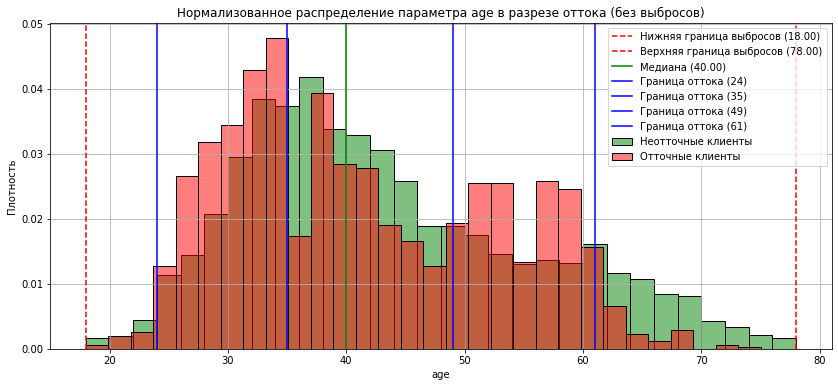

In [ ]:
# Визуализация распределений числовых параметров `age` в разрезе оттока
continuous_param_plot_churn(df, 'age', markers=[24, 35, 49, 61])

In [ ]:
df['age'].describe()

count    9973.000000
mean       42.730773
std        12.175166
min        18.000000
25%        33.000000
50%        40.000000
75%        51.000000
max        86.000000
Name: age, dtype: float64

- **Диапазон возрастов**: Основная масса клиентов находится в возрастном диапазоне от **18 до 76 лет**, что охватывает подавляющее большинство наблюдений. Возраст клиентов старше 76 лет встречается редко.
- **Средний возраст**: Средний возраст клиента составляет **42.7 года**, что близко к медианному значению (**40 лет**), указывая на относительную симметрию распределения.
- **Характер распределения**: Распределение имеет **хвост в сторону больших значений**, что говорит о наличии небольшой группы более возрастных клиентов.
- Стандартное отклонение равно **12.18**, что указывает на умеренную разбросанность возрастов вокруг среднего значения.

Клиентская база банка сосредоточена преимущественно в диапазоне трудоспособного возраста с небольшой долей пожилых клиентов.

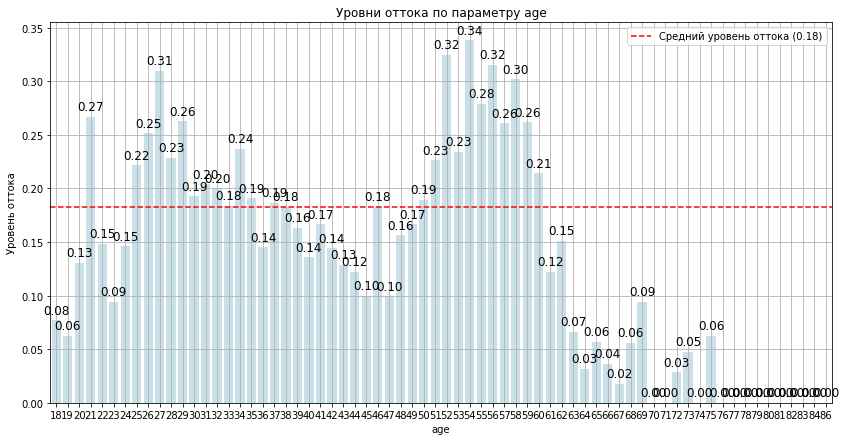

In [ ]:
# Анализ уровня оттока
levels_plot(df, 'age')

Больше всего отточных клиентов находится в сегменте **50-60 лет**, затем идут клиенты **24-35**. Уровень отточности клиентов остальных восрастных групп не превышает среднего уровня оттока.

#### Анализ распределения клиентов по количеству баллов собственности

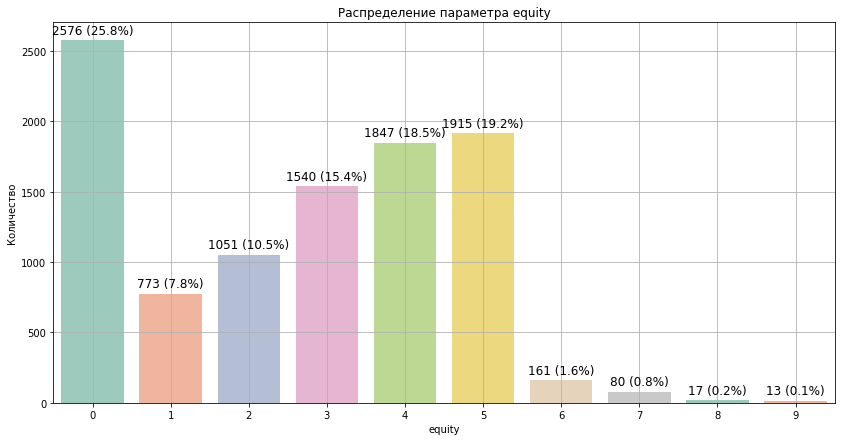

In [ ]:
# Визуализация категориальных параметров `equity`
category_param_plot(df, 'equity')

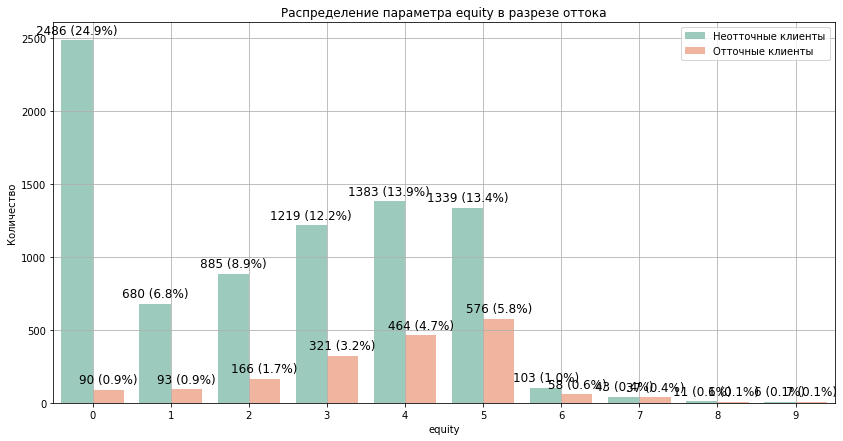

In [ ]:
# Визуализация категориальных параметров `equity` в разрезе оттока
category_param_plot_churn(df, 'equity')

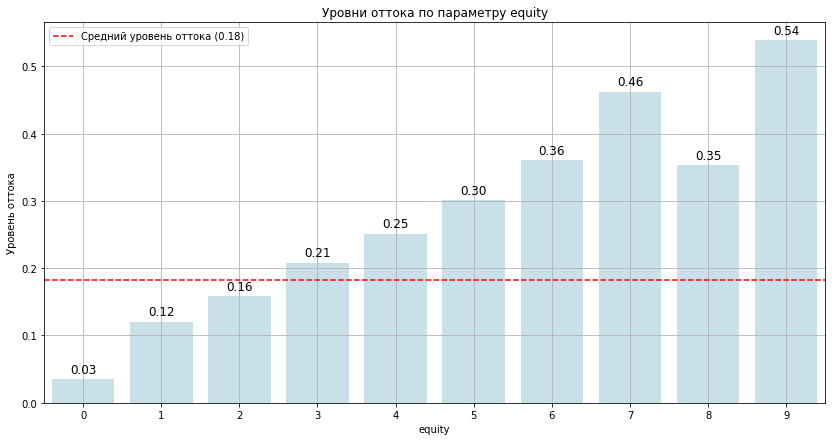

In [ ]:
# Анализ уровня оттока
levels_plot(df, 'equity')

In [ ]:
df['equity'].describe()

count    9973.000000
mean        2.630803
std         1.980060
min         0.000000
25%         0.000000
50%         3.000000
75%         4.000000
max         9.000000
Name: equity, dtype: float64

In [ ]:
df['equity'].value_counts().sort_values(ascending=False)

0    2576
5    1915
4    1847
3    1540
2    1051
1     773
6     161
7      80
8      17
9      13
Name: equity, dtype: int64

1. **Распределение баллов собственности**:
   - Баллы варьируются от **0 до 9**, медиана – **3**, среднее – **2.63**.
   - Большинство клиентов (25.8%) имеют **0 баллов**, распределение смещено в сторону меньших значений. Клиенты с баллами от **6 до 9** составляют менее **5%**.

2. **Анализ оттока**:
   - Вероятность оттока увеличивается с ростом баллов собственности.
   - Для клиентов с **3 баллами** отток составляет **21%**, а для клиентов с **9 баллами** достигает **54%**.

#### Анализ распределения клиентов по количеству средств на счёте

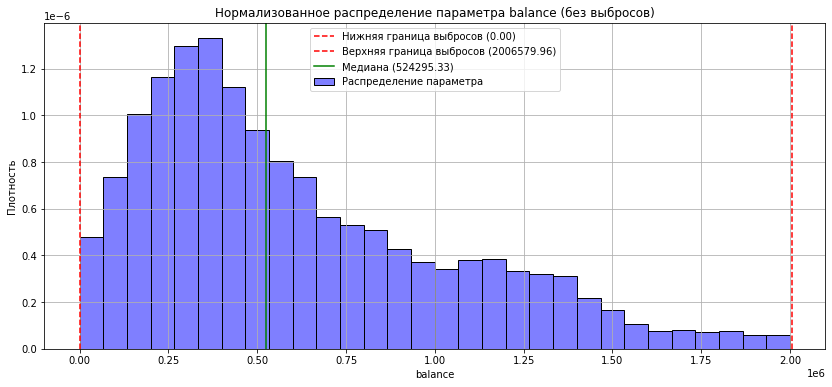

In [ ]:
# Визуализация распределений числовых параметров `balance`
continuous_param_plot(df, 'balance')

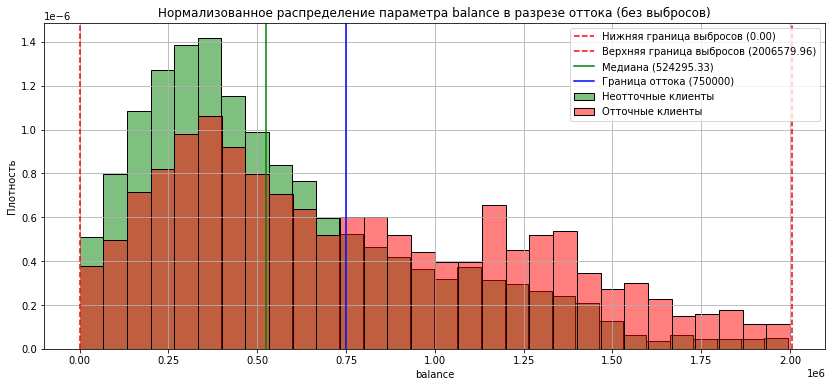

In [ ]:
continuous_param_plot_churn(df, 'balance', markers=[750000])

In [ ]:
df['balance'].describe()

count    7.695000e+03
mean     8.272456e+05
std      1.980327e+06
min      0.000000e+00
25%      2.956987e+05
50%      5.242953e+05
75%      9.800512e+05
max      1.191136e+08
Name: balance, dtype: float64

1. **Распределение баланса**:
   - Баланс клиентов варьируется от **0** до **119,113,600**.
   - Средний баланс: **827,245.6**, медианный баланс: **524,295.3**.
   - Большинство клиентов имеют баланс до **1,000,000**, что видно из смещения распределения в сторону меньших значений.

2. **Связь с оттоком**:
   - Клиенты с балансом **750,000 и выше** чаще подвержены оттоку.
   - Это может свидетельствовать о том, что клиенты с более высоким балансом менее удовлетворены текущим сервисом.

#### Анализ распределения клиентов по количеству используемых продуктов банка

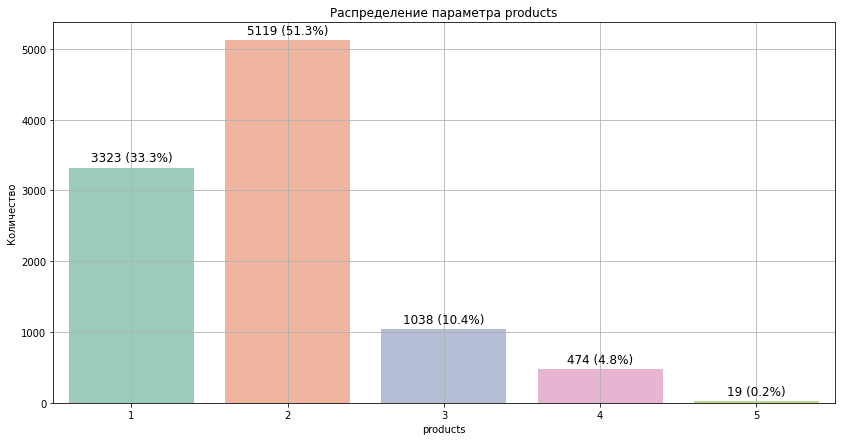

In [ ]:
# Визуализация категориальных параметров `products`
category_param_plot(df, 'products')

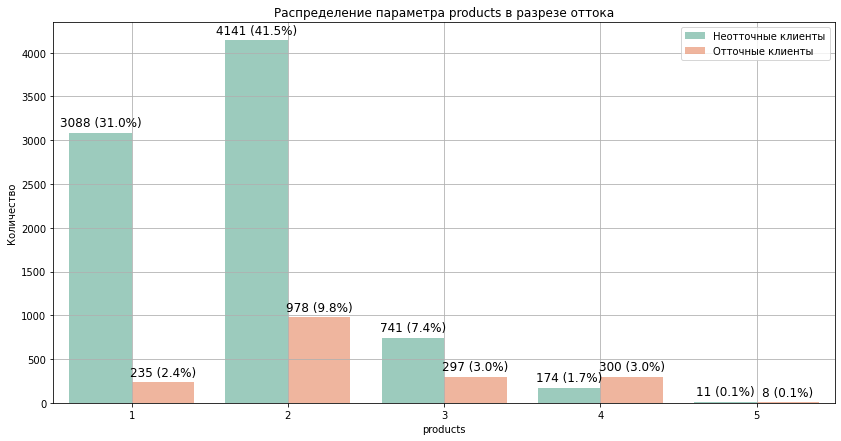

In [ ]:
# Визуализация категориальных параметров `products` в разрезе оттока
category_param_plot_churn(df, 'products')

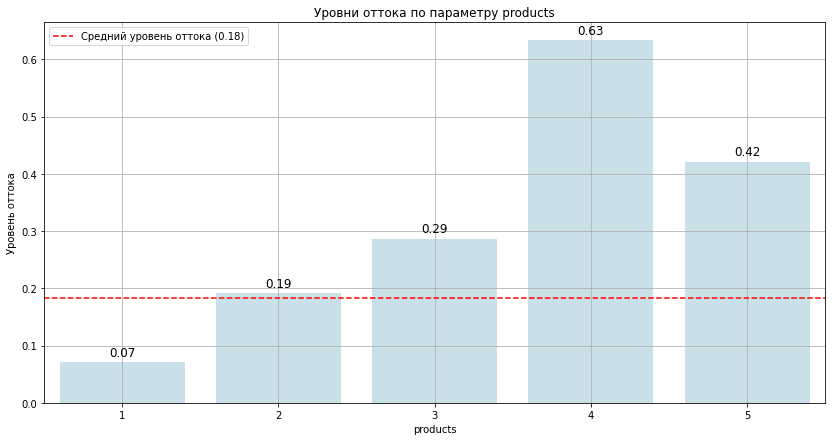

In [ ]:
# Анализ уровня оттока
levels_plot(df, 'products')

In [ ]:
df['products'].describe()

count    9973.000000
mean        1.871653
std         0.792547
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         5.000000
Name: products, dtype: float64

In [ ]:
df['products'].value_counts()

2    5119
1    3323
3    1038
4     474
5      19
Name: products, dtype: int64

1. **Общее распределение**:
   - Большинство клиентов используют **1 или 2 продукта** банка.
   - Среднее количество продуктов на клиента: **1.87**.
   - Распределение:
     - 1 продукт: **33.3%**.
     - 2 продукта: **51.4%**.
     - 3 продукта: **10.4%**.
     - 4 продукта: **4.7%**.
     - 5 продуктов: **0.2%**.

2. **Связь с оттоком**:
   - Клиенты с **3 и более продуктами** чаще уходят.
   - Максимальная доля оттока наблюдается среди клиентов с **4 продуктами** (**63%**).
   - Для клиентов с:
     - 1 продуктом — доля оттока минимальна (**7%**).
     - 2, 3 и 5 продуктами — доля оттока в диапазоне **20-30%**.

#### Анализ распределения клиентов по наличию кредитной карты

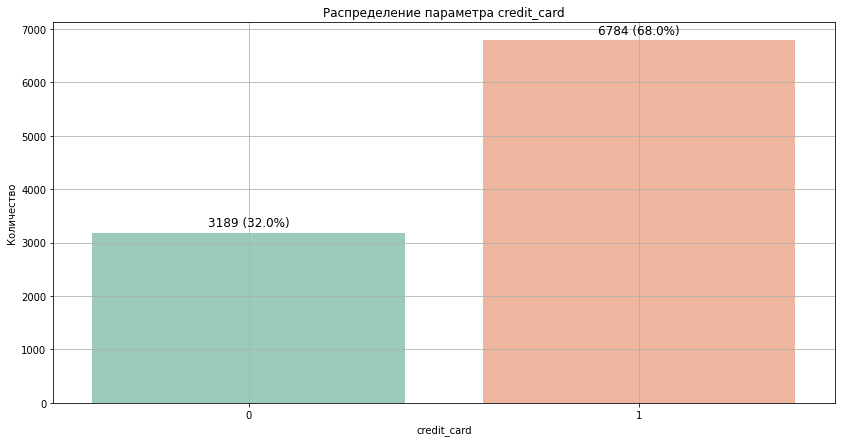

In [ ]:
# Визуализация категориальных параметров `credit_card`
category_param_plot(df, 'credit_card')

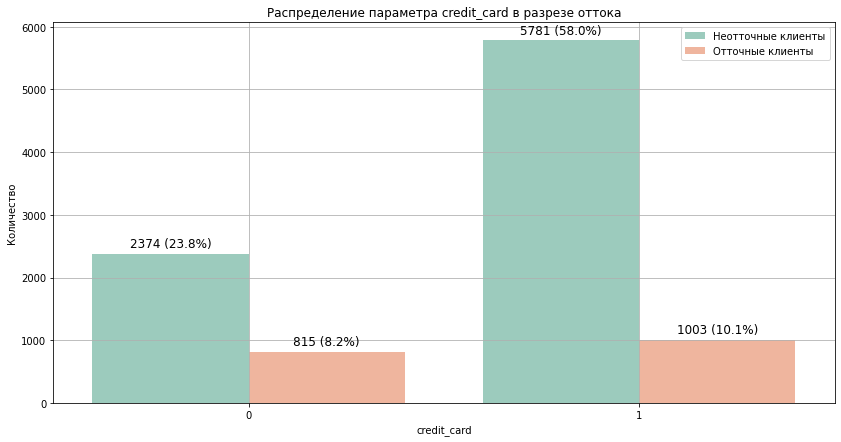

In [ ]:
# Визуализация категориальных параметров `credit_card` в разрезе оттока
category_param_plot_churn(df, 'credit_card')

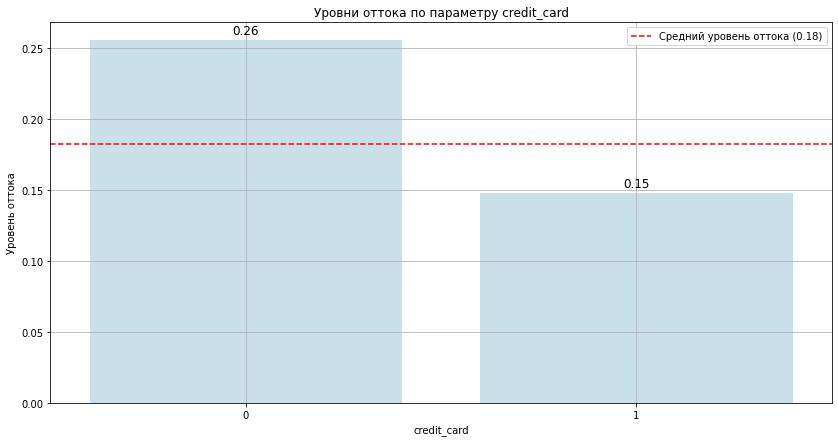

In [ ]:
# Анализ уровня оттока
levels_plot(df, 'credit_card')

In [ ]:
df['credit_card'].value_counts()

1    6784
0    3189
Name: credit_card, dtype: int64

1. **Общее распределение**:
   - 68% клиентов банка имеют кредитные карты (**6784 клиента**).
   - 32% клиентов не имеют кредитных карт (**3189 клиентов**).

2. **Связь с оттоком**:
   - Клиенты без кредитной карты демонстрируют более высокий уровень оттока (**26%**).
   - Среди клиентов с кредитной картой доля оттока составляет **15%**, что почти в 2 раза меньше.

#### Анализ распределения клиентов по параметру активности

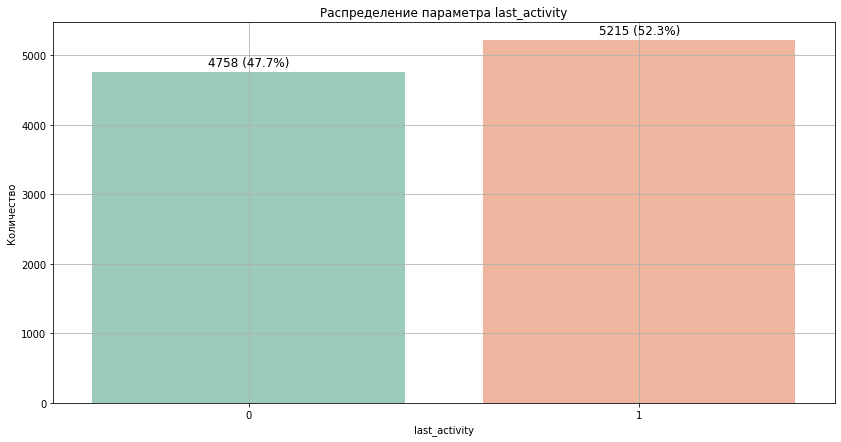

In [ ]:
# Визуализация категориальных параметров `last_activity`
category_param_plot(df, 'last_activity')

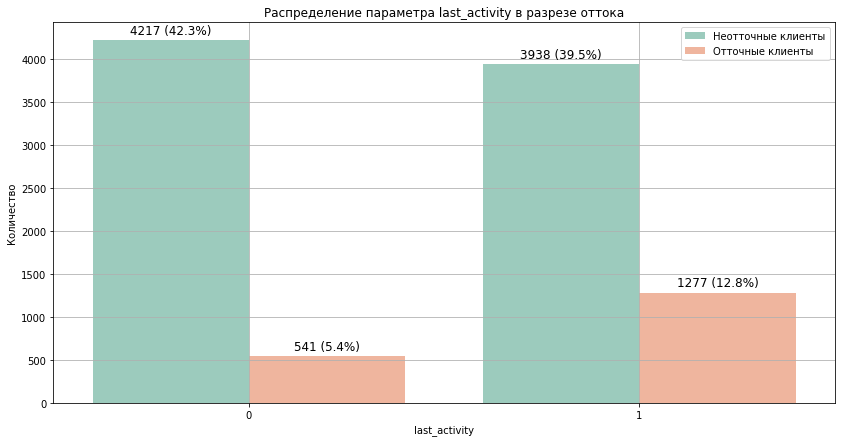

In [ ]:
# Визуализация категориальных параметров `last_activity` в разрезе оттока
category_param_plot_churn(df, 'last_activity')

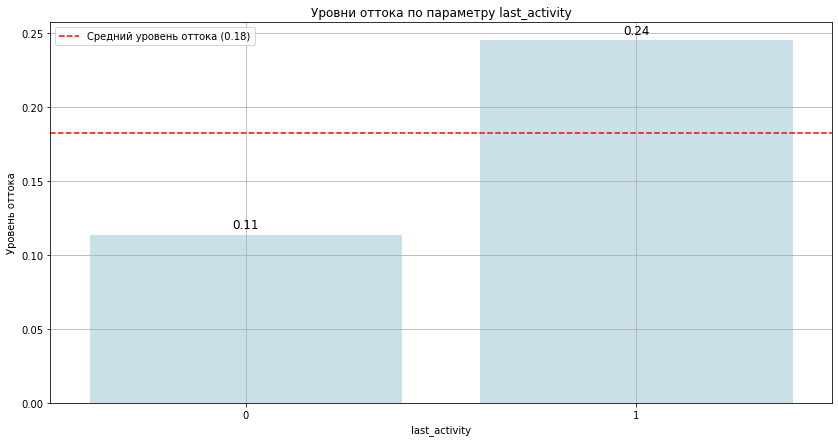

In [ ]:
# Анализ уровня оттока
levels_plot(df, 'last_activity')

In [ ]:
df['last_activity'].describe()

count    9973.000000
mean        0.522912
std         0.499500
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: last_activity, dtype: float64

In [ ]:
df['last_activity'].value_counts()

1    5215
0    4758
Name: last_activity, dtype: int64

1. **Общее распределение**:
   - **Активные клиенты** составляют **52.3%** выборки (5215 клиентов).
   - **Неактивные клиенты** составляют **47.7%** выборки (4758 клиентов).

2. **Связь с оттоком**:
   - У активных клиентов уровень оттока выше и составляет **24%**.
   - У неактивных клиентов уровень оттока значительно ниже — **11%**.

#### Анализ распределения клиентов по оценочному доходу

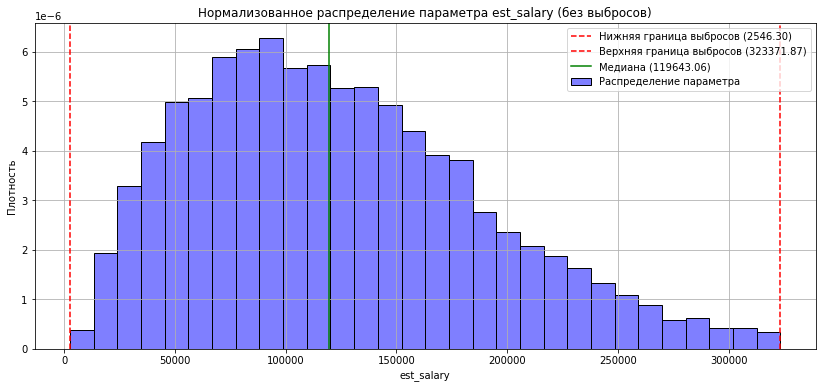

In [ ]:
# Визуализация распределений числовых параметров `est_salary`
continuous_param_plot(df, 'est_salary')

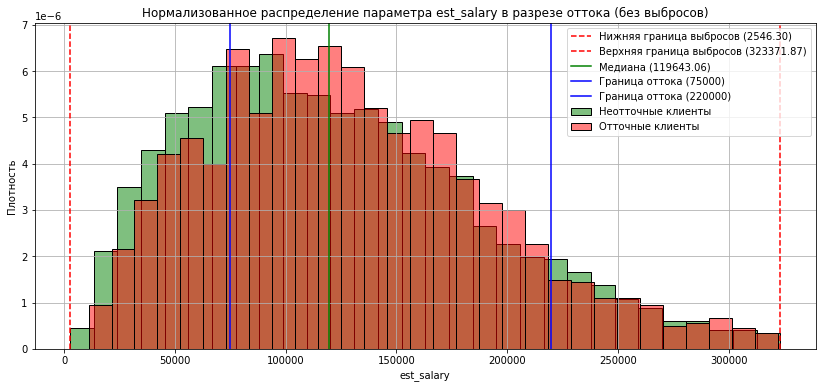

In [ ]:
continuous_param_plot_churn(df, 'est_salary', markers=[75000, 220000])

In [ ]:
df['est_salary'].describe()

count    9.973000e+03
mean     1.477991e+05
std      1.392871e+05
min      2.546300e+03
25%      7.525202e+04
50%      1.196431e+05
75%      1.745000e+05
max      1.395064e+06
Name: est_salary, dtype: float64

1. **Общее распределение**:
   - Средний доход: **150 000**.
   - Медианный доход: **120 000**.
   - Основная масса клиентов имеет доход в диапазоне от **50 000** до **150 000**.
   - Распределение имеет длинный хвост в сторону высоких значений (максимум: **1 395 064**).

2. **Связь с оттоком**:
   - Наиболее склонны к оттоку клиенты с доходом от **80 000** до **250 000**.

### Портреты клиентов и их сравнение

Составим портреты типичных клиетнов склонных к оттоку и предпочитающих остаться и сравним их.

#### Портрет клиента, склонного к оттоку:
Клиенты, склонные к оттоку, чаще всего имеют **кредитный скоринг от 820 до 940**, что свидетельствует о среднем уровне кредитоспособности. Мужчины склонны к уходу чаще, чем женщины, при этом **процент оттока среди мужчин составляет 24%**. В возрастной категории выделяются клиенты **50-60 лет** и **24-35 лет**, где наблюдается повышенный уровень оттока. Такие клиенты чаще обладают **баллами собственности более 3**. Клиенты с балансом на счёте от **750 000 и выше** также подвержены оттоку, что, возможно, связано с неудовлетворённостью уровнем обслуживания. Они активно пользуются банковскими услугами, и наибольший уровень оттока наблюдается среди клиентов с **более чем 3 продукиами**. Клиенты без кредитной карты уходят чаще, чем владельцы карт (**26% против 15%**). Активные клиенты показывают более высокий уровень оттока (**24%**), как и те, чей доход варьируется от **80 000 до 250 000**.

#### Портрет клиента, не склонного к оттоку:
Клиенты, не склонные к оттоку, чаще всего имеют **кредитный скоринг ниже 820 или выше 940**, что говорит о низком или высоком уровне кредитоспособности. Женщины остаются клиентами банка чаще мужчин. В возрастной группе наименее подвержены оттоку клиенты **от 35 до 49** или **старше 60 лет**. У таких клиентов чаще встречается **низкий уровень собственности (0-2 балла)**, что коррелирует с их стабильностью. Баланс на их счёте составляет сумму **до 750 000**, а доля клиентов с одним продуктом банка минимально подвержена оттоку (**7%**). Наличие кредитной карты снижает вероятность ухода (**15% против 26%** у тех, кто карты не имеет). Среди **неактивных клиентов** уровень оттока значительно ниже (**11%**). По уровню дохода наименее склонны к оттоку клиенты с заработком **до 80 000** или **выше 250 000**.


### Корреляционный анализ

Проанализируем, как отток клиентов коррелирует с другими параметрами, представленными в датафрейме. Используем вычисление Phik-корреляционной матрицы т.к. она учитывает зависимости между как числовыми, так и категориальными переменными, в отличие от корреляции Пирсона, которая работает только с числовыми данными и не улавливает нелинейные связи.

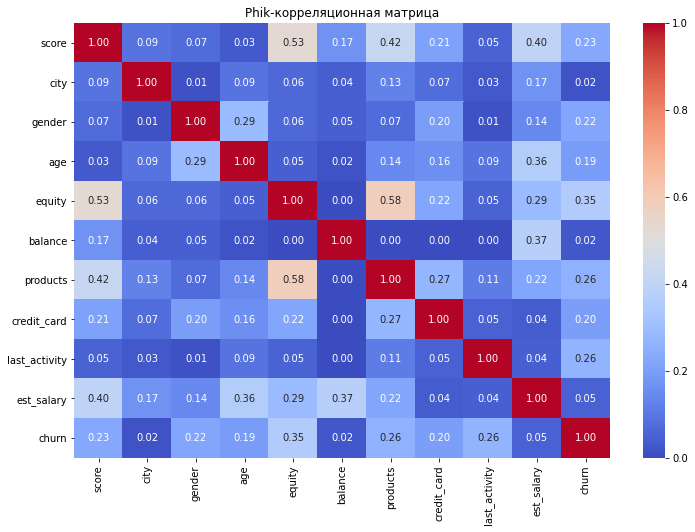

In [ ]:
# Определяем интервальные столбцы
interval_cols = ['score', 'age', 'balance', 'est_salary']

# Вычисление Phik-корреляционной матрицы без user_id
phik_matrix = df.drop(columns=['user_id']).phik_matrix(interval_cols=interval_cols)

# Визуализация корреляционной матрицы
plt.figure(figsize=(12, 8))
sns.heatmap(phik_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Phik-корреляционная матрица')
plt.show()

Для наглядности выберем только столбец с корреляцией для churn.

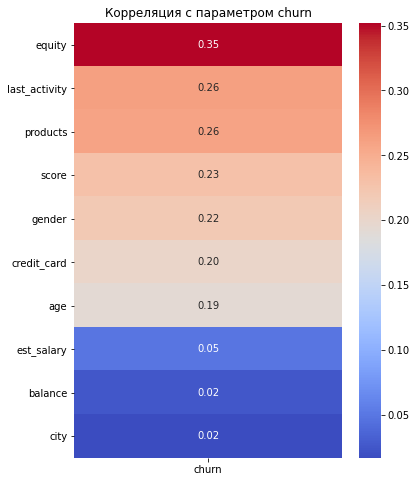

In [ ]:
# Выбираем только столбец с корреляцией для 'churn'
churn_correlation = phik_matrix[['churn']]

# Визуализация корреляции для 'churn'
plt.figure(figsize=(6, 8))
sns.heatmap(churn_correlation.drop('churn').sort_values(by='churn', ascending=False),
            annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Корреляция с параметром churn')
plt.show()

1. **Связи с оттоком (`churn`):**

    - Наиболее значимые факторы, связанные с оттоком, — это **`equity` (0.35), `last_activity` (0.26), `products` (0.26), `score` (0.23) и `gender` (0.22)**.

    - Остальные параметры, такие как **`credit_card` (0.20), `age` (0.19), `est_salary` (0.05), `balance` (0.02) и `city` (0.02)**, имеют слабое влияние на отток.

2. **Связи между другими столбцами:**

    - Наблюдаются умеренные и слабые корреляции между **`score`, `equity`, `products`, `age`, `gender`, `balance` и `est_salary`**, но они не связаны напрямую с оттоком.

## Проверка гипотез

### Гипотеза о различии дохода между клиентами, которые ушли и теми, которые остались

**Сформулируем нулевую и альтернативную гипотезы:** <br/>

- **Нулевая гипотеза:** Статистически значимых различий в уровне дохода между группой клиентов, которые ушли, и группой клиентов, которые остались - нет.
- **Альтернативная гитопеза:** Есть статистически значимые различия в уровне дохода между группой клиентов, которые ушли, и группой клиентов, которые остались

**Ход выполнения:**
1. Разделяем данные на две группы.
2. Задаем **уровень значимости - 0.05**.
3. Используем **тест Манна-Уитни** для сравнения двух независимых выборок. Этот тест проверяет, есть ли статистически значимые различия между двумя группами.
4. Интерпретация результатов:
    - Если p-value меньшемα, мы отвергаем нулевую гипотезу и делаем вывод, что различия между группами статистически значимы.
    - Если p-value больше или равно α, мы не можем отвергнуть нулевую гипотезу и делаем вывод, что значимых различий нет.
5. Выводим средние значения доходов в обеих группах и их относительное различие для наглядности.

Проверку на нормальность применять не будем, т.к для больших выборок (обычно более 5000 наблюдений) тест Шапиро-Уилка может быть неточным. Тест Манна-Уитни, который мы используем, не требует нормальности распределения и подходит для сравнения двух независимых выборок.

In [ ]:
# Подготовка данных
sampleA = df[df['churn'] == 0]['est_salary']  # группа оставшихся клиентов
sampleB = df[df['churn'] == 1]['est_salary']  # группа отточных клиентов

# Уровень статистической значимости
alpha = 0.05

# Тест Манна-Уитни для независимых выборок
p_value = stats.mannwhitneyu(sampleA, sampleB, alternative="two-sided")[1]
print(f'p-value = {p_value:.5f}')

if p_value < alpha:
    print("Отвергаем нулевую гипотезу: есть статистически значимые различия.")
else:
    print("Наблюдения не противоречат нулевой гипотезе: значимых различий нет.")

print()
print('Уровень дохода в группе А (оставшиеся): {0:.5f}'.format(sampleA.mean()))
print('Уровень дохода в группе B (отток): {0:.5f}'.format(sampleB.mean()))
print('Отношение средних: {0:.2%}'.format(sampleB.mean() / sampleA.mean() - 1))

p-value = 0.00017
Отвергаем нулевую гипотезу: есть статистически значимые различия.

Уровень дохода в группе А (оставшиеся): 147674.63788
Уровень дохода в группе B (отток): 148357.48316
Отношение средних: 0.46%


**Вывод:**<br/>
- Различия в уровне дохода между двумя группами являются статистически значимыми. Это означает, что наблюдаемая разница в доходах не случайна и может быть объяснена различиями между группами.
- Средний уровень дохода у отточных клиентов (группа B) на **0.46% выше**, чем у оставшихся клиентов (группа A). Хотя разница статистически значима, её величина (0.46%) может считаться небольшой с практической точки зрения.

### Гипотеза о влиянии количества продуктов на отток

**Сформулируем нулевую и альтернативную гипотезы:** <br/>

- **Нулевая гипотеза:** Количество продуктов не влияет на вероятность оттока (распределения между группами не различаются).
- **Альтернативная гитопеза:** Количество продуктов влияет на вероятность оттока (распределения между группами различаются).

**Ход выполнения:**
1. Разделим данные на две группы: отточных клиентов и оставшихся.
2. Сравним распределение количества продуктов в этих группах с использованием теста Манна-Уитни (непараметрический тест, подходящий для независимых выборок).
3. Выводим среднее количество продуктов для каждой группы и интерпретируем результаты.

In [ ]:
# Подготовка данных
sampleA = df[df['churn'] == 0]['products']  # Группа оставшихся клиентов
sampleB = df[df['churn'] == 1]['products']  # Группа отточных клиентов

# Уровень значимости
alpha = 0.05

# Тест Манна-Уитни
p_value = stats.mannwhitneyu(sampleA, sampleB, alternative="two-sided")[1]
print(f'p-value = {p_value:.5f}')

# Интерпретация
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: есть статистически значимые различия.")
else:
    print("Наблюдения не противоречат нулевой гипотезе: значимых различий нет.")

print()
print(f'Среднее количество продуктов у оставшихся клиентов: {sampleA.mean():.2f}')
print(f'Среднее количество продуктов у отточных клиентов: {sampleB.mean():.2f}')
print(f'Относительное различие: {((sampleB.mean() / sampleA.mean()) - 1) * 100:.2f}%')

p-value = 0.00000
Отвергаем нулевую гипотезу: есть статистически значимые различия.

Среднее количество продуктов у оставшихся клиентов: 1.76
Среднее количество продуктов у отточных клиентов: 2.38
Относительное различие: 35.16%


**Вывод:**<br/>
- Различия в количестве продуктов между двумя группами являются статистически значимыми. Это означает, что наблюдаемая разница не случайна и может быть объяснена различиями между группами.
- Среднее количество продуктов у отточных клиентов (группа B) на **35.16% выше**, чем у оставшихся клиентов (группа A). Разница значительна и может свидетельствовать о влиянии количества продуктов на склонность к оттоку.

## Сегментация пользователей

Проведем сегментацию с вычислением уровня оттока и размера сегмента

1. **Определим признаки отточности** для каждого сегмента.

2. **Рассчитаем общее количество пользователей** в каждом сегменте.

3. **Рассчитаем количество отточных пользователей** в каждом сегменте.

4. **Вычислим уровень оттока** (доля отточных пользователей в сегменте).

In [ ]:
# Функция для расчета уровня оттока и приоритетного контроля
def calculate_segment(df, conditions):
    # Общее число пользователей в сегменте
    total_users = df.query(conditions).shape[0]

    # Число отточных пользователей в сегменте
    churn_users = df.query(conditions + ' and churn == 1').shape[0]

    # Доля отточных пользователей
    churn_rate = (churn_users / total_users) * 100 if total_users > 0 else 0

    return total_users, churn_users, churn_rate

### Сегмент 1

46-62 года, скоринговый рейтинг >= 800

In [ ]:
conditions_1 = 'age >= 46 and age <= 62 and score >= 800'
total_users_1, churn_users_1, churn_rate_1 = calculate_segment(df, conditions_1)

print("Сегмент 1:")
print(f"Общее число пользователей: {total_users_1}")
print(f"Число отточных пользователей: {churn_users_1}")
print(f"Доля отточных пользователей: {churn_rate_1:.2f}%")

Сегмент 1:
Общее число пользователей: 2080
Число отточных пользователей: 521
Доля отточных пользователей: 25.05%


### Сегмент 2

Клиенты с балансом на счете > 950000 и доходом 95-250 тыс.

In [ ]:
conditions_2 = 'balance > 950000 and est_salary >= 95000 and est_salary <= 250000'
total_users_2, churn_users_2, churn_rate_2 = calculate_segment(df, conditions_2)

print("Сегмент 2:")
print(f"Общее число пользователей: {total_users_2}")
print(f"Число отточных пользователей: {churn_users_2}")
print(f"Доля отточных пользователей: {churn_rate_2:.2f}%")

Сегмент 2:
Общее число пользователей: 1264
Число отточных пользователей: 531
Доля отточных пользователей: 42.01%


### Сегмент 3

Клиенты без кредитной карты и с высокой активностью

In [ ]:
conditions_3 = 'credit_card == 0 and last_activity == 1'
total_users_3, churn_users_3, churn_rate_3 = calculate_segment(df, conditions_3)

print("Сегмент 3:")
print(f"Общее число пользователей: {total_users_3}")
print(f"Число отточных пользователей: {churn_users_3}")
print(f"Доля отточных пользователей: {churn_rate_3:.2f}%")

Сегмент 3:
Общее число пользователей: 1745
Число отточных пользователей: 612
Доля отточных пользователей: 35.07%


**Вывод по сегментации:**<br/>

На основе проведенной сегментации можно сделать следующие выводы:

---

**Сегмент 1 (46-62 года, скоринговый рейтинг >= 800)**
- **Общее число пользователей**: 2080
- **Число отточных пользователей**: 521
- **Доля отточных пользователей**: 25.05%

Этот сегмент представляет собой достаточно зрелую аудиторию с высоким скоринговым рейтингом. Несмотря на это, отток составляет значительную часть, что может указывать на необходимость дополнительных усилий по удержанию клиентов, например, через улучшение предложений или сервисов для этой возрастной группы.

**Сегмент 2 (Баланс на счете > 950000 и доход 95-250 тыс.)**
- **Общее число пользователей**: 1264
- **Число отточных пользователей**: 531
- **Доля отточных пользователей**: 42.01%

Этот сегмент характеризуется высокой покупательной способностью (высокий баланс и доход), однако уровень оттока значительно выше, чем в первом сегменте. Это может указывать на то, что, несмотря на высокие финансовые возможности, эти пользователи менее лояльны. При этом потеря таких клиентов может быть особенно опасной для бизнеса, так как они приносят больший доход.

**Сегмент 3 (Клиенты без кредитной карты и с высокой активностью)**
- **Общее число пользователей**: 1745
- **Число отточных пользователей**: 612
- **Доля отточных пользователей**: 35.07%

Этот сегмент включает активных пользователей, не имеющих кредитной карты, что может указывать на более низкий уровень вовлеченности в финансовые продукты. Однако уровень оттока все равно остается высоким. Такие пользователи могут быть более чувствительны к изменениям в предложениях или услугах.

**Приоритетность сегментов:**

1. **Сегмент 2** имеет самый высокий уровень оттока (42.01%) среди всех трех сегментов. Несмотря на его относительно небольшой размер (1264 пользователя), потеря таких клиентов будет иметь серьезные финансовые последствия, поскольку их баланс и доход выше среднего. Этот сегмент требует самого пристального внимания и усилий по удержанию.

2. **Сегмент 3** имеет высокий уровень оттока (35.07%), но также и более крупный размер (1745 пользователей). Несмотря на большую численность, потеря клиентов с высокой активностью также негативно скажется на бизнесе, поскольку активные пользователи часто являются более прибыльными. Это еще один приоритетный сегмент для принятия мер по удержанию.

3. **Сегмент 1** имеет более низкий уровень оттока (25.05%) по сравнению с другими сегментами, однако его размер больше, чем у сегмента 2. Этот сегмент может быть менее приоритетным, но также требует внимания, особенно если бизнес ориентирован на долгосрочное удержание зрелых клиентов.

**Рекомендации:**

- Для **Сегмента 2**: Внедрить массовые программы удержания, например, бонусы за использование услуг или улучшение условий по депозитам.
- Для **Сегмента 3**: Возможно, стоит предложить кредитные карты с бонусами за использование и улучшить качество обслуживания для активных клиентов.
- Для **Сегмента 1**: Разработать персонализированные предложения, такие как эксклюзивные условия обслуживания или индивидуальные консультации для более возрастных клиентов.


## Выводы и рекомендации

**Цель исследования:**  
Целью проекта было выделить однородные и высокоотточные сегменты клиентов банка «Метанпром», чтобы разработать стратегии удержания и снизить уровень оттока. Это позволит минимизировать риски для банка, повысить устойчивость бизнеса и сохранить ключевые группы клиентов, которые приносят наибольшую прибыль.

---

**Результаты исследования:**  

1. **Подготовка и предобработка данных:**  
   - Проведена загрузка и очистка данных, удалены дубликаты и аномалии. Категориальные переменные преобразованы в числовые для анализа.  
   - Удалены клиенты с нулевым количеством продуктов, так как они уже не являются активными пользователями.  

2. **Исследовательский анализ данных:**  
   - Выявлены ключевые факторы, влияющие на отток:  
     - **Количество продуктов** и **количество баллов собственности** имеют наибольшее влияние на отток (корреляция 0.30 и 0.27 соответственно).  
     - Клиенты с **высоким балансом на счете** (от 750,000) и **высоким доходом** (от 80,000 до 250,000) чаще уходят.  
     - **Мужчины** уходят чаще, чем женщины (24% против 19%).  
     - **Активные клиенты** демонстрируют более высокий уровень оттока (24%), чем неактивные (11%).  
     - Клиенты **без кредитной карты** уходят чаще (26%), чем те, у кого карта есть (15%).  

3. **Портреты клиентов:**  
   - **Клиент, склонный к оттоку:**  
     - Мужчина 46-62 лет с высоким уровнем собственности (баллы собственности от 3 и выше).  
     - Имеет кредитный скоринг от 820 до 940, баланс на счете от 750,000, доход от 80,000 до 250,000.  
     - Пользуется 3 и более продуктами банка, не имеет кредитной карты, активный клиент.  
   - **Клиент, не склонный к оттоку:**  
     - Женщина 35-49 лет или старше 60 лет с низким уровнем собственности (0-2 балла).  
     - Имеет баланс на счете до 750,000, доход до 80,000 или выше 250,000.  
     - Пользуется 1-2 продуктами банка, имеет кредитную карту, неактивный клиент.  

4. **Корреляционный анализ:**
    - **Наиболее значимые факторы**, связанные с оттоком, — это **`equity` (0.35), `last_activity` (0.26), `products` (0.26), `score` (0.23) и `gender` (0.22)**.

5. **Проверка гипотез:**
    - **Гипотеза о различии дохода между клиентами, которые ушли, и теми, которые остались:**
        - p-value = 0.00017 (отвергаем нулевую гипотезу).
        - Средний уровень дохода у отточных клиентов на **0.46% выше**, чем у оставшихся клиентов. Разница статистически значима, её величина (0.46%) может считаться небольшой с практической точки зрения.
    - **Гипотеза о влиянии количества продуктов на отток:**
        - p-value = 0.00000 (отвергаем нулевую гипотезу).
        - Среднее количество продуктов у отточных клиентов **на 35.16% выше**, чем у оставшихся.

6. **Сегментация клиентов:**  
   - Выделены три ключевых сегмента с высоким уровнем оттока:  
     - **Сегмент 1:** 46-62 года, скоринговый рейтинг >= 800. Уровень оттока — 25.05%.  
     - **Сегмент 2:** Клиенты с балансом на счете более 950,000 и доходом 95-250 тыс. Уровень оттока — 42.01%.  
     - **Сегмент 3:** Клиенты без кредитной карты и с высокой активностью. Уровень оттока — 35.07%.  

7. **Рекомендации:**  
   - **Для Сегмента 1:** Разработать персонализированные предложения, такие как эксклюзивные условия обслуживания или индивидуальные консультации.  
   - **Для Сегмента 2:** Внедрить массовые программы удержания, например, бонусы за использование услуг или улучшение условий по депозитам.  
   - **Для Сегмента 3:** Предложить кредитные карты с бонусами за использование и улучшить качество обслуживания для активных клиентов.  

---

**Возможные причины оттока:**  
- **Конкуренция:** Отток состоятельных клиентов может быть связан с более выгодными предложениями конкурентов, таких как повышенные процентные ставки по вкладам или сниженные комиссии.  
- **Неудовлетворённость уровнем сервиса:** Клиенты с высоким балансом на счете и доходом могут быть недовольны качеством обслуживания, что подталкивает их к поиску альтернатив.  
- **Отсутствие персонализированного подхода:** Клиенты с большим количеством продуктов и высокой активностью могут чувствовать недостаток внимания со стороны банка, что приводит к их уходу.  
- **Отсутствие кредитной карты:** Клиенты без кредитной карты могут уходить из-за отсутствия выгодных условий или недостаточной информированности о преимуществах её использования.

## Презентация

Ссылка на презентацию: https://docs.google.com/presentation/d/14BKlMvsYf6g87LZ-7g-FlvrbDkfp0YWY/edit?usp=sharing&ouid=107229254109953877503&rtpof=true&sd=true